In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# PART 1 - MACHINE LEARNING
# Task 1.1 - Data Preparation
# Loading dataset. 
data = pd.read_excel('ENB2012_data.xlsx')
print(data)

# Extracting inputs.
inputs = data.values[:,:8].astype(float)
targets = data.values[:,8:].astype(float)

# Projecting data into 2 dimensions with PCA.
pca = PCA(n_components = 2)
compressed = pca.fit_transform(inputs)

# Scaling the data.
scaler = MinMaxScaler()
scaled = scaler.fit_transform(inputs)

print(inputs.ptp(axis=0))
print(scaled.ptp(axis=0))

       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]
[  0.36 294.   171.5  110.25   3.5    3.     0.4    5.  ]
[1.         1.         1.00000191 1.         1.         1.
 1.         1.        ]


In [2]:
# Part 1 - Machine Learning - Regression

# Making training and testing data.
X_train, X_test, y_train, y_test = train_test_split(compressed, targets, test_size = 0.2, random_state = 0)

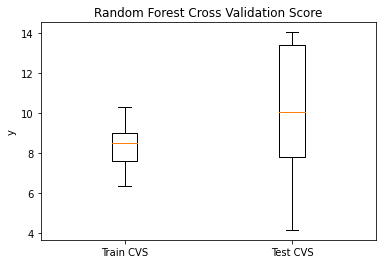

In [6]:
# Random Forest Regressor.
def random_forest_regressor():
    for i in range(100):
        regressor = RandomForestRegressor()
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        x_pred = regressor.predict(y_test)
    train_scores = cross_val_score(regressor, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")
    test_scores = cross_val_score(regressor, X_test, y_test, cv = 10, scoring = "neg_mean_squared_error")
        
    
    plt.figure()
    plt.title("Random Forest Cross Validation Score")
    plt.boxplot([abs(train_scores), abs(test_scores)])
    plt.xticks([1, 2], ["Train CVS", "Test CVS"])
    plt.ylabel("y")
    plt.show()

random_forest_regressor()

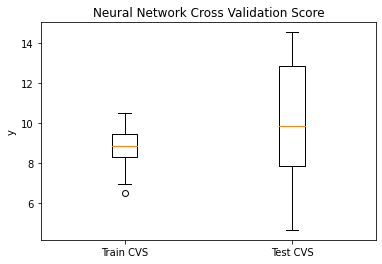

In [7]:
# Neural Network.
def neural_network():
    for i in range(100):
        regressor = MLPRegressor(max_iter = 6000)
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        x_pred = regressor.predict(y_test)
    train_scores = cross_val_score(regressor, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")
    test_scores = cross_val_score(regressor, X_test, y_test, cv = 10, scoring = "neg_mean_squared_error")

    plt.figure()
    plt.title("Neural Network Cross Validation Score")
    plt.boxplot([abs(train_scores), abs(test_scores)])
    plt.xticks([1, 2], ["Train CVS", "Test CVS"])
    plt.ylabel("y")
    plt.show()
    
neural_network()

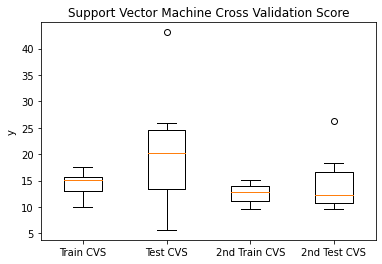

In [9]:
# Support Vector Machine.
def support_vector_machine(): 
    for i in range(100):
        svregressor = SVR()
        svregressor.fit(X_train, y_train[:, 0])
        y_pred = svregressor.predict(X_test)
        x_pred = svregressor.predict(y_test)
        
        svregressor_2 = SVR()
        svregressor_2.fit(X_train, y_train[:, 1])
        y_pred_2 = svregressor.predict(X_test)
        x_pred_2 = svregressor.predict(y_test)
        
    train_scores = cross_val_score(svregressor, X_train, y_train[:, 0], cv = 10, scoring = "neg_mean_squared_error")
    train_scores_2 = cross_val_score(svregressor, X_train, y_train[:, 1], cv = 10, scoring = "neg_mean_squared_error")
    test_scores = cross_val_score(svregressor, X_test, y_test[:, 0], cv = 10, scoring = "neg_mean_squared_error")
    test_scores_2 = cross_val_score(svregressor, X_test, y_test[:, 1], cv = 10, scoring = "neg_mean_squared_error")
    
    plt.figure()
    plt.title("Support Vector Machine Cross Validation Score")
    plt.boxplot([abs(train_scores), abs(test_scores), abs(train_scores_2), abs(test_scores_2)])
    plt.xticks([1, 2, 3, 4], ["Train CVS", "Test CVS", "2nd Train CVS", "2nd Test CVS"])
    plt.ylabel("y")
    plt.show()
    
support_vector_machine()

In [56]:
#PART 2 - OPTIMISATION
import random
# Task 2.1 - Generation of random solutions
file = open('Modules.txt', 'r')
contents = file.read()
file.close()

splitted = contents.split("\n")

# Extracting clashes from text file.
def get_clashes():
    clashes = []
    for i in range(len(splitted)):

        clashes.append(splitted[i].split("|"))
        clashes[i].pop(0)
        clashes[i].pop(0)
        clashes[i].pop(0)


    for i in range(len(clashes)):
        clashes[i].append(clashes[i][0].split(","))
        clashes[i].pop(0)
    
    return clashes

# Extracting number of labs for each module.
def get_lab_number():
    labs = []
    int_labs = []
    for i in range(len(splitted)):

        labs.append(splitted[i].split("|"))
        labs[i].pop(0)
        labs[i].pop(0)
        labs[i].pop(1)
        
    for i in range(len(labs)):
        int_labs.append(int(labs[i][0]))
    return int_labs
    
# Extracting module name.
def get_module_name():
    module = np.array([])
    for i in range(len(splitted)):
        module = np.concatenate((module, splitted[i].split("|")))
        
    module = module[0::4]
    return module

def lecture_lab_clash(lab, clashes, lecture):   
    # Check for clashes.
    c_constraints = 0
    p_constraints = 0
    if len(lab) < len(lecture):
        count = len(lab)
    else:
        count = len(lecture)
    
    for i in range(count):
        if lecture[i] == lab[i]:
            c_constraints = c_constraints + 1
        for j in range(i):
            if j < i:
                if lecture[i] == lab[j]: # if lab is before lecture
                    p_constraints = p_constraints + 1
                    break
    
    return c_constraints, p_constraints

def module_clashes_array():
    module = get_module_name()
    clashes = get_clashes()

    module = np.split(module, 17)
    
    for i in range(len(module)):
        for j in range(len(clashes[i])):
            module[i] = np.concatenate([module[i], clashes[i][j]])
            
    return module
    
def modules_clash(lab, clashes, lecture):
    c_constraints = 0
    module_and_clashes = module_clashes_array()
    if len(lab) < len(lecture): # Finding the shortest array so the index won't be out of range
        count = len(lab)
    else:
        count = len(lecture)
      
    # Find the matching module
    for i in range(count):
        for j in range(len(module_and_clashes)):      
            if lecture[i] == module_and_clashes[j][0]:
                if lab[i] is not None and lab[i] in module_and_clashes[j] and lab[i] != module_and_clashes[j][0]:
                    c_constraints = c_constraints + 1
                    #print(f"Constraint found {lecture[i]} cannot be timetabled with {lab[i]}\n")
                    break
    return c_constraints


def generate_lab_sessions(labs, module):
    sessions = []
    for i in range(len(module)):
        for j in range(labs[i]):
            sessions.append(module[i])
            
    return sessions

def get_constraints_total(timetable, clashes):
    c_constraints = [int] * 4
    p_constraints = [int] * 2
    total_c_constraints = 0
    total_p_constraints = 0
    
    c_constraints[0], p_constraints[0] = lecture_lab_clash(timetable[1], clashes, timetable[0])
    c_constraints[1], p_constraints[1] = lecture_lab_clash(timetable[2], clashes, timetable[0])
    
    c_constraints[2] = modules_clash(timetable[1], clashes, timetable[0])
    c_constraints[3] = modules_clash(timetable[2], clashes, timetable[0])

    for i in range(len(c_constraints)):
        total_c_constraints = total_c_constraints + c_constraints[i]
    
    for i in range(len(p_constraints)):
        total_p_constraints = total_p_constraints + p_constraints[i]
        
    return total_c_constraints, total_p_constraints
            
def generate_solution():
    
    clashes = get_clashes()
    labs = get_lab_number()
    module = get_module_name()
    
    lecture_theatre = []
    lab_1 = []
    lab_2 = []
    
    lab = generate_lab_sessions(labs, module)
    
    total_c_constraints = 0
    total_p_constraints = 0
    
    # Assign lectures.
    for i in range(len(module)):
        
        lecture_theatre.append(module[i])
        

    
    # Assign labs.
    for i in range(len(lab)):

        lab_slot = np.random.randint(0,2)
        if len(lab_1) >= 20:
            lab_slot = 1
        if len(lab_2) >= 20:
            lab_slot = 0
        if lab_slot == 0:
            lab_1.append(lab[i])
        elif lab_slot == 1:
            lab_2.append(lab[i])
    
    # Shuffle the lectures and labs so the solution is random.
    random.shuffle(lecture_theatre)
    random.shuffle(lab_1)
    random.shuffle(lab_2)
    
    # Put the sessions into the timetable array.
    timetable = np.empty([3, 20], dtype = object)
    for i in range(len(lecture_theatre)):
        timetable[0][i] = lecture_theatre[i]
    for i in range(len(lab_1)):
        timetable[1][i] = lab_1[i]
    for i in range(len(lab_2)):
        timetable[2][i] = lab_2[i]
    
    total_c_constraints, total_p_constraints = get_constraints_total(timetable, clashes)
    
    # Calculate fitness function.
    fitness = total_c_constraints * total_p_constraints
    
    print(f"Concurrence constraints: {total_c_constraints}")
    print(f"Precedence constraints: {total_p_constraints}\n")
    print(f"Fitness: {fitness}\n")
    
    print(f"Lectures {timetable[0]}\n")
    print(f"Lab 1 {timetable[1]}\n")
    print(f"Lab 2 {timetable[2]}\n")
    
        

generate_solution()




Concurrence constraints: 27
Precedence constraints: 17

Fitness: 459

Lectures ['MOD002' 'MOD005' 'MOD006' 'MOD010' 'MOD003' 'MOD009' 'MOD017' 'MOD013'
 'MOD008' 'MOD007' 'MOD001' 'MOD016' 'MOD004' 'MOD014' 'MOD012' 'MOD015'
 'MOD011' None None None]

Lab 1 ['MOD008' 'MOD006' 'MOD005' 'MOD001' 'MOD001' 'MOD008' 'MOD015' 'MOD009'
 'MOD011' 'MOD003' 'MOD005' 'MOD002' None None None None None None None
 None]

Lab 2 ['MOD003' 'MOD011' 'MOD015' 'MOD004' 'MOD009' 'MOD016' 'MOD013' 'MOD010'
 'MOD010' 'MOD006' 'MOD012' 'MOD012' 'MOD014' 'MOD017' 'MOD014' 'MOD007'
 'MOD009' 'MOD006' 'MOD002' None]

